In [2]:
#Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import streamlit as st

In [3]:
#Import warnings for sklearn
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Define Path and Dataframe
path="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/immobili.csv"
dfold=pd.read_csv(path, delimiter=',')
dfold

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [5]:
df = dfold.rename(columns={'medv': 'price'})

In [6]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


EDA

In [7]:
# Provides summary statistics of the dataframe
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,507,507,507,507,507,507,507,507,507,507,507,507,507,507
unique,505,27,77,3,82,447,357,413,10,67,47,358,456,230
top,0.01501,0.0,18.1,0,0.538,5.713,100.0,3.4952,24,666,20.2,396.9,7.79,50.0
freq,2,372,132,471,23,3,43,5,132,132,140,121,3,16


In [8]:
# Group by of "price" and count
df.groupby('price').count()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
price,,,,,,,,,,,,,
10.2,3,3,3,3,3,3,3,3,3,3,3,3,3
10.4,2,2,2,2,2,2,2,2,2,2,2,2,2
10.5,2,2,2,2,2,2,2,2,2,2,2,2,2
10.8,1,1,1,1,1,1,1,1,1,1,1,1,1
10.9,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.8,2,2,2,2,2,2,2,2,2,2,2,2,2
9.5,1,1,1,1,1,1,1,1,1,1,1,1,1
9.6,1,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
#Provides information about the dataframe, such as the data type in each column and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crim     507 non-null    object
 1   zn       507 non-null    object
 2   indus    507 non-null    object
 3   chas     507 non-null    object
 4   nox      507 non-null    object
 5   rm       507 non-null    object
 6   age      507 non-null    object
 7   dis      507 non-null    object
 8   rad      507 non-null    object
 9   tax      507 non-null    object
 10  ptratio  507 non-null    object
 11  b        507 non-null    object
 12  lstat    507 non-null    object
 13  price    507 non-null    object
dtypes: object(14)
memory usage: 55.6+ KB


In [10]:
# Counts the number of missing values in each column of the dataframe
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [11]:
df.shape

(507, 14)

In [12]:
df = df.drop(index=df.index[-1])

In [13]:
df.shape

(506, 14)

In [14]:
df = df.astype(float)

In [15]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [16]:
# Computes the pairwise correlation between columns in the dataframe
df.corr()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

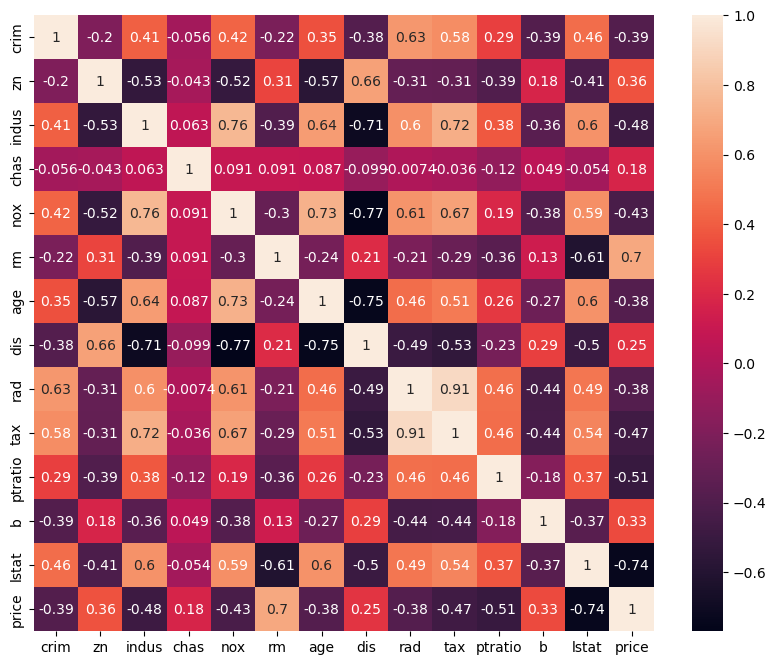

In [17]:
# Plots a pairwise scatter plot matrix of all columns in the dataframe
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [18]:
#dfnew = df.drop('crim', 'zn', 'chas', 'nox', 'age', 'dis', 'rad', tax, 'b', axis=1)

columns_to_drop = ['crim', 'zn', 'chas', 'nox', 'age', 'dis', 'rad', 'b', 'indus', 'tax']
dfnew = df.drop(columns_to_drop, axis=1)

In [19]:
dfnew

,rm,ptratio,lstat,price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


In [20]:
dfnew.describe()

,rm,ptratio,lstat,price
count,506.000000,506.000000,506.000000,506.000000
mean,6.284634,18.455534,12.653063,22.532806
std,0.702617,2.164946,7.141062,9.197104
min,3.561000,12.600000,1.730000,5.000000
25%,5.885500,17.400000,6.950000,17.025000
50%,6.208500,19.050000,11.360000,21.200000
75%,6.623500,20.200000,16.955000,25.000000
max,8.780000,22.000000,37.970000,50.000000


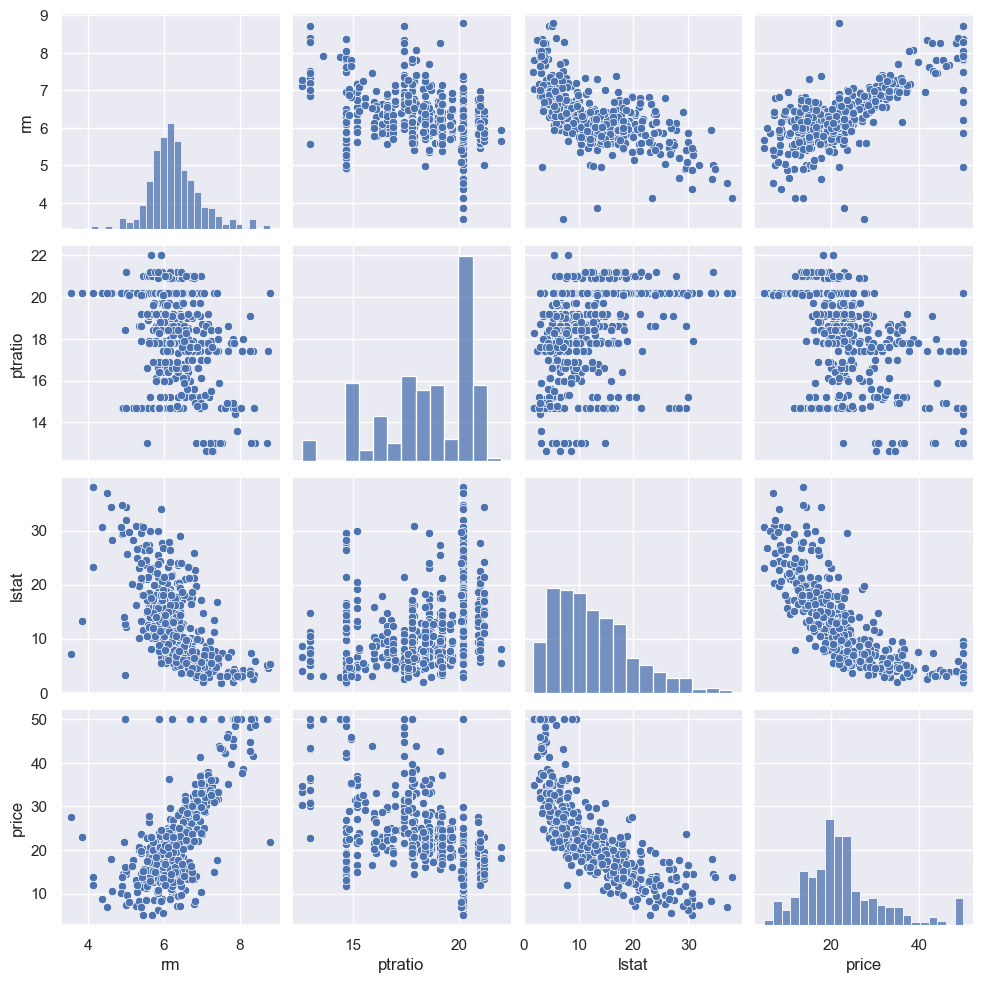

In [21]:
# Sets seaborn color codes and creates a pairwise scatter plot matrix of all columns in the dataframe
sns.set(color_codes=True)
sns.pairplot(dfnew);

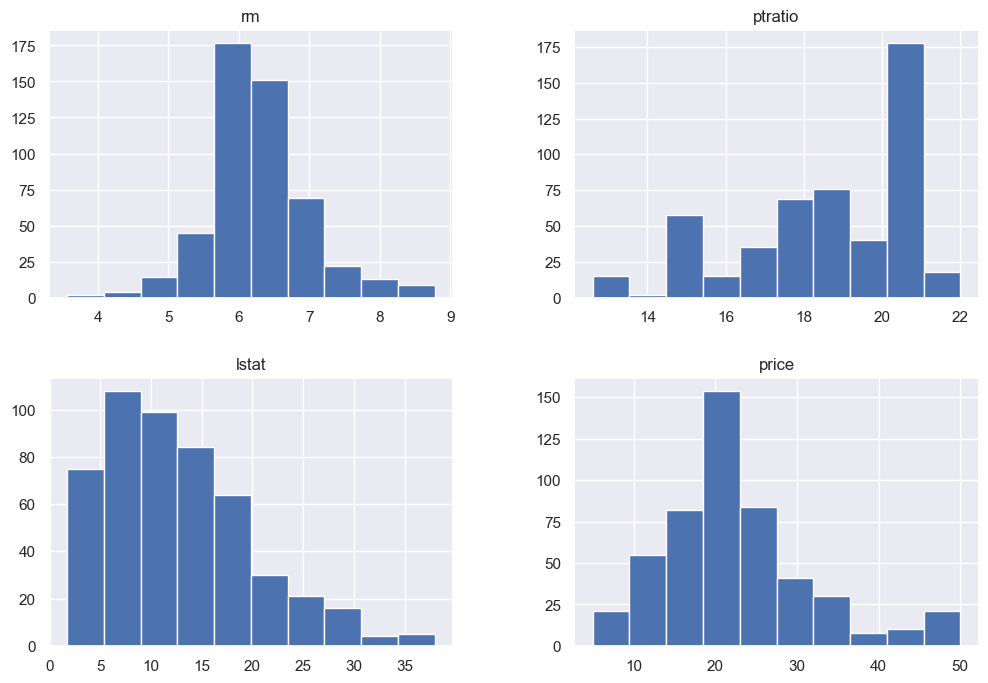

In [22]:
# Creates a histogram of all columns in the dataframe
dfnew.hist(figsize=(12,8));

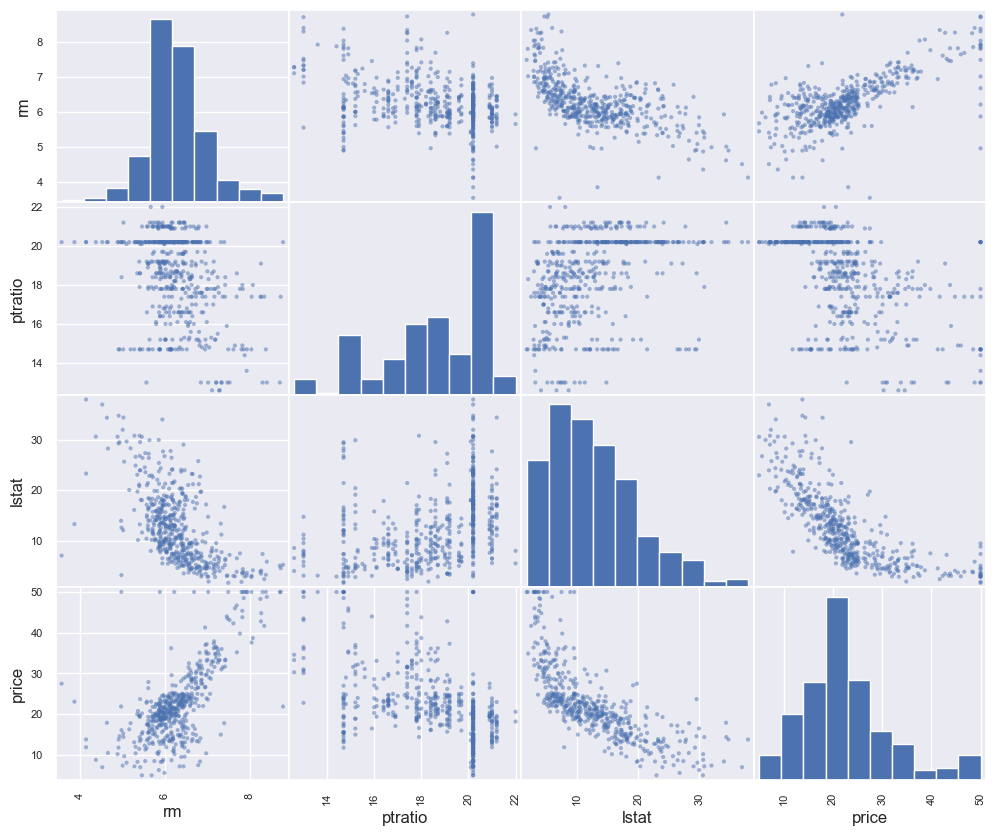

In [23]:
# Creates a scatter matrix of all columns in the dataframe
pd.plotting.scatter_matrix(dfnew, figsize=(12,10));

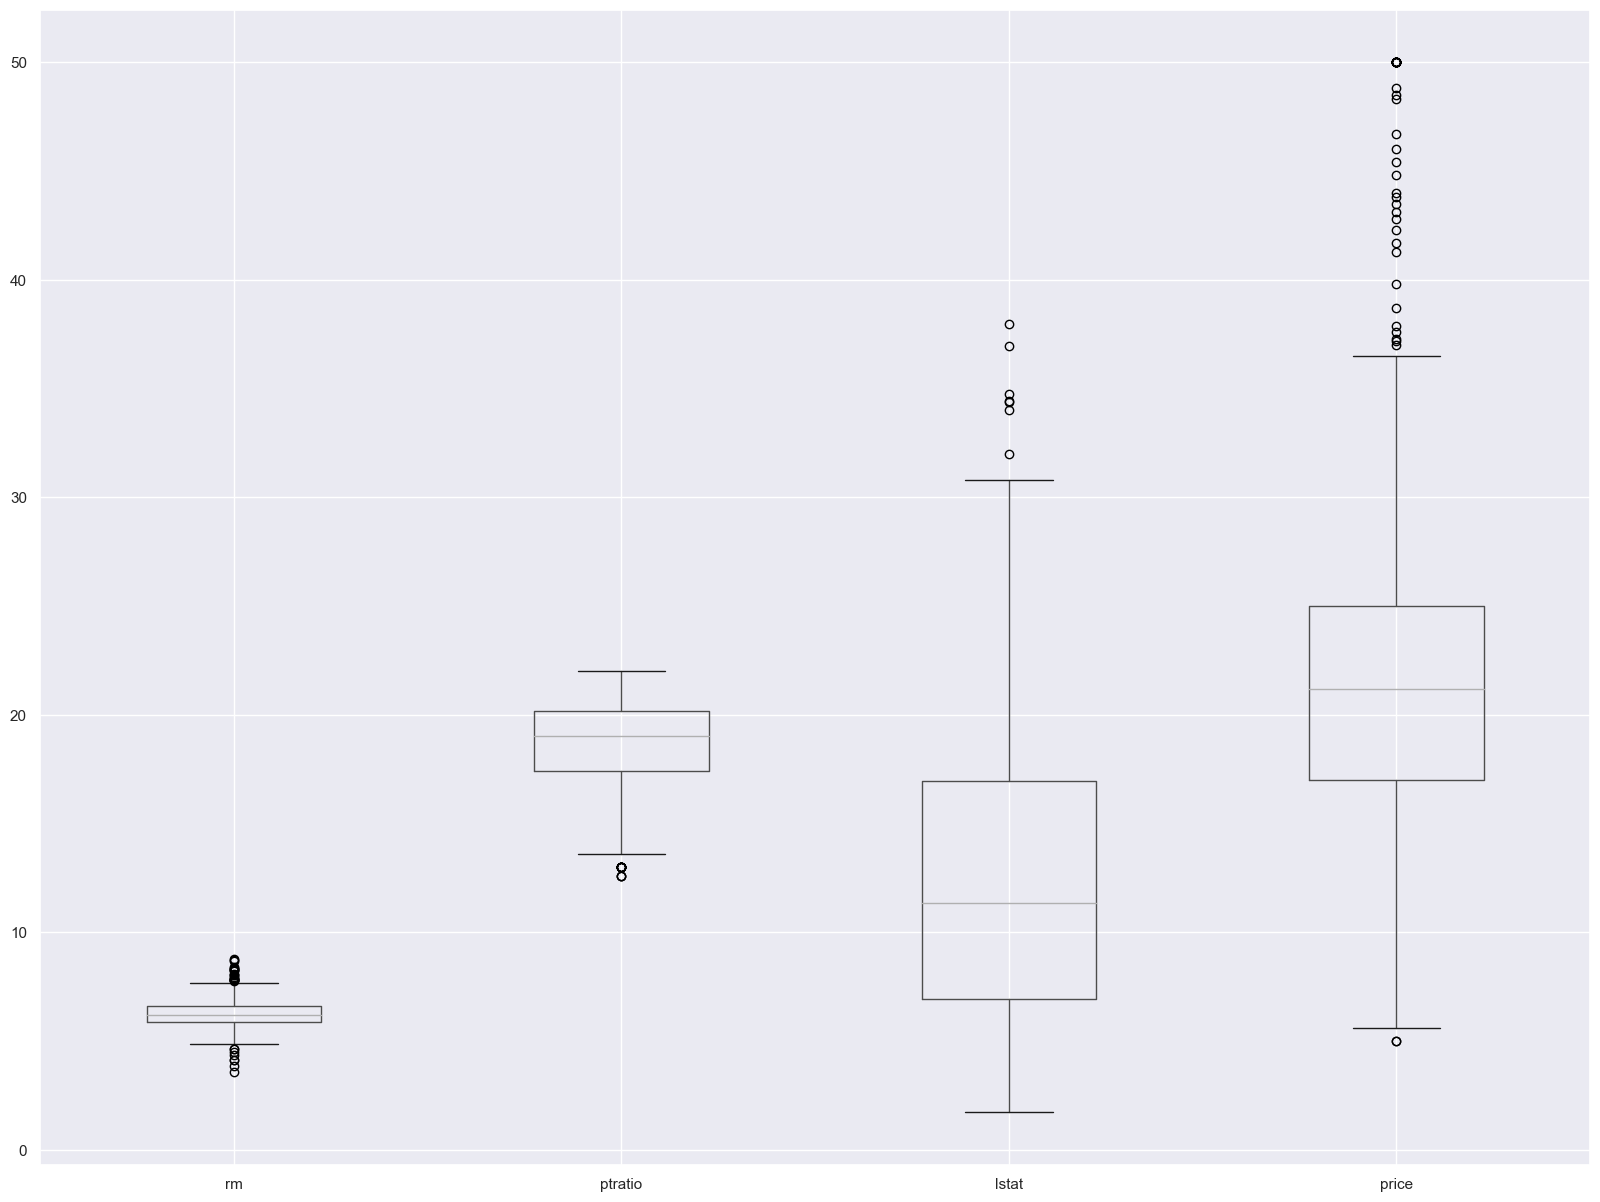

In [24]:
# Creates a box plot of all columns in the dataframe
dfnew.boxplot(figsize=(20,15));

EDA END

In [25]:
# Creates a target variable y containing the 'Target' column and a 
# feature matrix X containing all other columns in the dataframe

y=dfnew['price']
X=dfnew.drop(columns='price')
X

,rm,ptratio,lstat
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
...,...,...,...
501,6.593,21.0,9.67
502,6.120,21.0,9.08
503,6.976,21.0,5.64
504,6.794,21.0,6.48


In [26]:
# Splits the data into training and testing sets, with 25% of the data in the testing set

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               train_size=0.25,
                                               random_state=667)


In [27]:
# Creates a Linear Regression model and fits it to the training data

model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [28]:
# Prints the coefficients of the Linear Regression model
model.coef_

array([ 4.06636519, -1.25259742, -0.51907149])

In [29]:
# Prints the intercept of the Linear Regression model
model.intercept_


26.581362980110196

In [30]:
# Predicts the target variable for the testing set and training set

y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

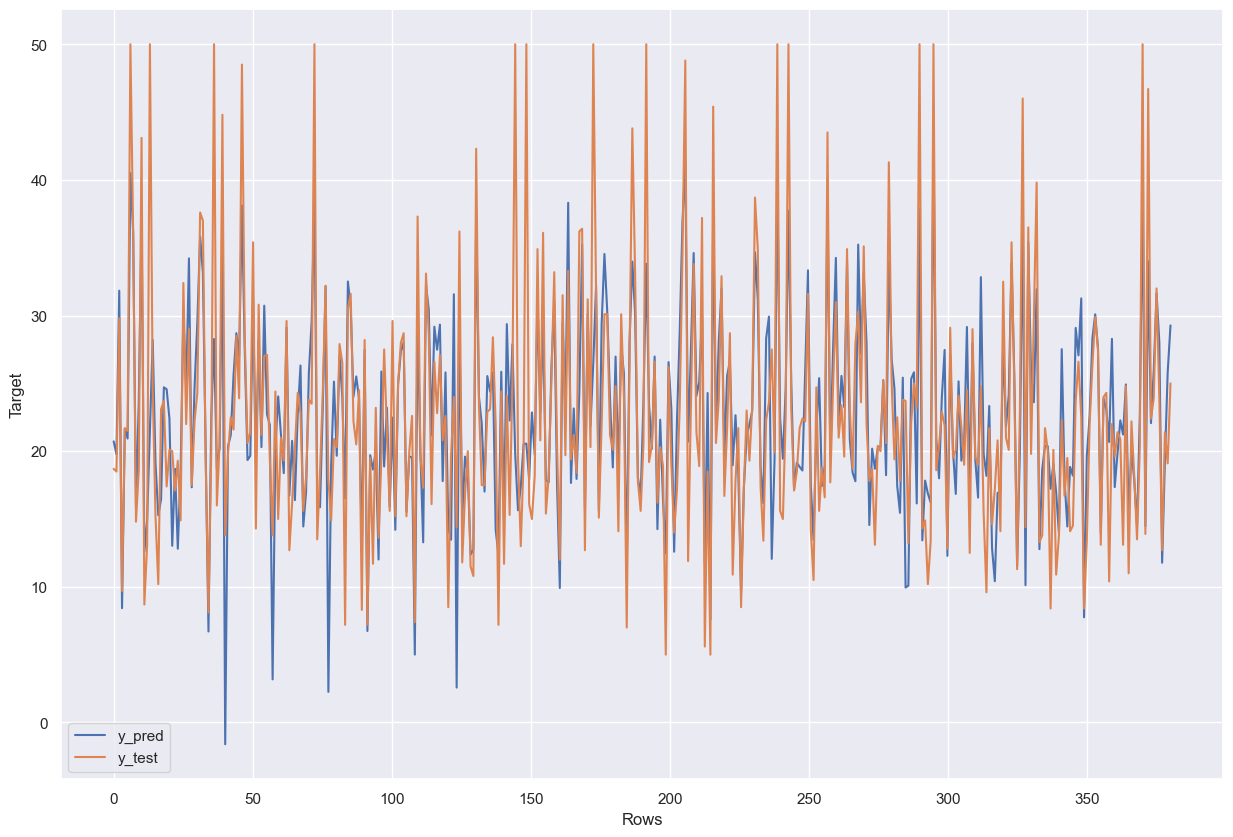

In [31]:
# Plots the predicted target variable values against the true target variable values for the testing set

plt.figure(figsize = (15, 10))
x = np.linspace(0,y_pred.shape[0], y_pred.shape[0])
plt.plot(x,y_pred)
plt.plot(x, y_test)
plt.title('')
plt.xlabel('Rows')
plt.ylabel('Target')
plt.legend(labels= ['y_pred', 'y_test'])

In [32]:
# Creates a DataFrame with the predicted and true target variable values, and calculates the error between them

res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,20.724788,18.7
1,19.768723,18.5
2,31.834006,29.8
3,8.427354,9.7
4,21.642669,21.7
...,...,...
375,28.037096,23.9
376,11.776946,12.7
377,19.310566,21.4
378,25.833978,19.1


In [33]:
# Creates a DataFrame with the predicted and true target variable values, and calculates the error between them

res_df['error'] = res_df['real'] - res_df['predicted']
res_df

,predicted,real,error
0,20.724788,18.7,-2.024788
1,19.768723,18.5,-1.268723
2,31.834006,29.8,-2.034006
3,8.427354,9.7,1.272646
4,21.642669,21.7,0.057331
...,...,...,...
375,28.037096,23.9,-4.137096
376,11.776946,12.7,0.923054
377,19.310566,21.4,2.089434
378,25.833978,19.1,-6.733978


In [34]:
# Creates a DataFrame with the predicted and true target variable values, and calculates the error between them

res_df['error'].mean()

0.10788839853563274

In [35]:
dfnew

,rm,ptratio,lstat,price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


In [48]:
# Creates a 3D scatter plot of the data, with Sales as the color variable and TV, Radio, and Newspaper as the axes

import plotly.express as px

fig = px.scatter_3d(df, x='lstat', y='rm', z='ptratio', color='price', color_continuous_scale='Reds', title='Regressione multipla')
fig.update_layout(
    scene=dict(
        xaxis_title='lstat',
        yaxis_title='rm',
        zaxis_title='ptratio'
    )
)

fig.show()


In [37]:
# Creates a 3D scatter plot of the data, with Sales as the color variable and TV, Radio, and Newspaper as the axes

import plotly.express as px

fig = px.scatter_3d(df, x='indus', y='age', z='tax', color='price', color_continuous_scale='Reds', title='Regressione multipla')
fig.update_layout(
    scene=dict(
        xaxis_title='indus',
        yaxis_title='age',
        zaxis_title='tax'
    )
)

fig.show()

In [38]:
# Calculates regression metrics for the Linear Regression model

r2score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred, squared=False)
    
print('R2 score:',r2score)
print('MAE:' ,mae)
print('MSE:',mse)
print('RMSE:',rmse)

R2 score: 0.6486138506914364
MAE: 3.775373497786128
MSE: 30.5518766204703
RMSE: 5.527375201709243


In [39]:
# Import joblib package

import joblib


In [40]:
# Loads the saved Linear Regression model using the joblib package and makes a prediction

joblib.dump(model,'algo.pkl')

['algo.pkl']

In [41]:
# Loads the saved Linear Regression model using the joblib package and makes a prediction
newmodel = joblib.load('algo.pkl')
newmodel


LinearRegression()

In [42]:
newmodel.predict(X_test)

array([20.72478849, 19.76872304, 31.83400644,  8.42735446, 21.64266917,
       20.93594354, 40.50067208, 36.07268561, 15.89657223, 23.54175614,
       37.10820379, 12.56573297, 14.92550154, 21.6086699 , 28.20238237,
       19.13741803, 15.27850874, 16.45212503, 24.70924687, 24.56787488,
       22.40595079, 13.02834596, 18.69736567, 12.81035425, 18.47653198,
       30.18382204, 24.54011908, 34.21379966, 17.33910086, 24.66429642,
       29.49712253, 35.85505029, 33.15992209, 19.74658339,  6.70811108,
       22.47721261, 28.27206172, 18.66973631, 20.27060715, 36.24978662,
       -1.60363005, 20.35871805, 21.19223806, 25.65094645, 28.70231608,
       27.00079047, 38.12368442, 27.52245346, 19.34741307, 19.66483156,
       31.14021662, 19.030682  , 28.23411985, 20.30054104, 30.72807021,
       22.69926922, 21.94177021,  3.18036718, 20.33190153, 24.039903  ,
       21.19726208, 18.38103934, 29.11413259, 16.73076821, 20.76286181,
       16.39496001, 22.73941607, 26.3170049 , 14.45123469, 16.98